### Generacion de números pseudo-aleatorios

#### Katherine González

In [4]:
def init_arrays():
    x_array = []
    y_array = []
    rand_array = []
    return x_array,y_array,rand_array

def input_seeds(seed0,seed1,quantity):
    while(seed0 == 0 or seed1 == 0 or quantity == 0):
            while(len(str(seed0))<4 or len(str(seed1))<4):
                seed0 = int(input("Digita el numero semilla1(Min.4 digitos):"))
                seed1 = int(input("Digita el numero semilla2(Min.4 digitos):"))
                quantity = int(input("Digita la cantidad de numeros aleatorios que deseas:"))
                if(len(str(seed0))<34or len(str(seed1))<4 or quantity == 0):
                    print("Has digitado algo mal, porfavor vuelve a intentarlo \n")
    return(seed0,seed1,quantity)

def find_mid(y,seed0):
    if(len(str(y)) % 2 != 0):
        y = "0" + str(y)
    have = len(str(y))
    need = len(str(seed0))
    mid = int((have-need)/2)
    x = str(y)[mid:-mid]
    rand = float("0."+x)
    return(x,rand)

def append_lists(y_array,x_array,rand_array,y,x,rand):
    y_array.append(y)
    x_array.append(x)
    rand_array.append(rand)
    return(y_array,x_array,rand_array)

def print_tables(quantity,y_array,x_array,rand_array):
    print("#\ty\t\t\tx\t\tr")
    for i in range(quantity):
        print("{iteration}\t{y}\t\t{x}\t\t{r}".format(
            iteration=i+1,
            y=y_array[i],
            x=x_array[i],
            r=rand_array[i]
        ))

In [5]:
import matplotlib.pyplot as plt
class Nrand():
    def ProdMed(seed0 = 0,seed1 = 0,quantity = 0):
        """Metodo de Multiplicador Constante
        Nrand.ProdMed(semilla1,semilla2,cantidad_de_numeros_aleatorios)
        Is a number between 0 to 1, result mid numbers product between seed1 and seed2
        ex.
        Nrand.ProdMed(5015,5734,5)
        result
        #	y			x		r
        1	28756010		7560		0.756
        2	43349040		3490		0.349
        3	26384400		3844		0.3844
        4	13415560		4155		0.4155
        5	15971820		9718		0.9718
        """
        x_array,y_array,rand_array = init_arrays()
        seed0,seed1,quantity = input_seeds(seed0,seed1,quantity)
        for i in range(quantity):
            y = int(seed0)*int(seed1)
            x, rand = find_mid(y,seed0)
            y_array,x_array,rand_array = append_lists(y_array,x_array,rand_array,y,x,rand)
            seed0 = seed1
            seed1 = x
        print_tables(quantity,y_array,x_array,rand_array)
        
        mi_path = "fichero.txt"
        f = open(mi_path,'w')

        for i in rand_array:
            f.write('%s\n'%i)

        f.close()
        
        aleatorios = rand_array # genera aleatorios
        cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
        plt.ylabel('frequencia')
        plt.xlabel('valores')
        plt.title('Histograma Chi cuadrado')
        plt.show()

#	y			x		r
1	2820928770841638449118		287708416384		0.287708416384
2	10860221364751255670016		221364751255		0.221364751255
3	63688502026814126561920		502026814126		0.502026814126
4	111131040832342110228130		040832342110		0.04083234211
5	20498930622786212645860		930622786212		0.930622786212
6	37999507981969774987320		507981969774		0.507981969774
7	472739596056539847956088		596056539847		0.596056539847
8	302785975208153780584578		975208153780		0.97520815378
9	581279197772687873671660		197772687873		0.197772687873
10	192869537808736525109940		537808736525		0.537808736525
11	106363879384131319661325		879384131319		0.879384131319
12	472940468584806071726475		468584806071		0.468584806071
13	412066042636028412437649		042636028412		0.042636028412
14	19978595105074666089252		595105074666		0.595105074666
15	25372916871584957410392		916871584957		0.916871584957
16	545634933024969247399362		933024969247		0.933024969247
17	855464082357953072817379		082357953072		0.082357953072
18	7684202663224866917

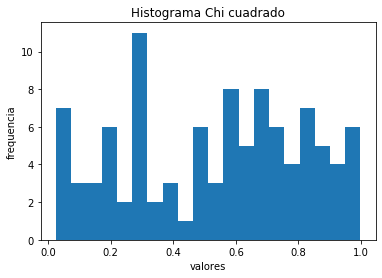

In [6]:
Nrand.ProdMed(74731897457,37747318974,100)

In [7]:
import math
class ChiCuadrado(object):
    def __init__(self, valores):
        self.valores = valores
        self.n = valores.__len__()
        self.m = math.sqrt(self.n)
        self.rango_menor = list({})
        self.rango_mayor = list({})
        self.fo = list({})
        self.cuadrados = list({})

        self.sum_fo = 0
        self.sum_cuadrados = 0

        print(self.n)
        print('m = sqrt({0:4d}) = {1:6.2f}'.format(self.n, self.m))
        print(math.floor(math.sqrt(self.n)))
        self.fe = int((self.n) / math.floor( math.sqrt(self.n))) # revisar
        print("self.fe",self.fe)

    def start(self):
        paso = round(1.0 / self.fe,2)
        for i in range(self.fe):
            if i == 0 :
                self.rango_menor.append(0)
            else:
                self.rango_menor.append(self.rango_mayor[i-1])
            self.rango_mayor.append( self.rango_menor[i] + paso )
        self.rango_mayor[i] = 1.0 # el ultimo valor debe ser 1.0
        self.iniciar_conteo()

    def iniciar_conteo(self):
        self.sum_fo = 0
        self.sum_cuadrados = 0
        for i in range(self.fe):
            if i != (self.fe - 1):
                self.fo.append( self.contar( self.rango_menor[i], self.rango_mayor[i], ">" ) )
            else:
                self.fo.append( self.contar( self.rango_menor[i], self.rango_mayor[i], "]" ) )
            self.cuadrados.append(math.pow(self.fe - self.fo[i],2)/self.fe)
            self.sum_fo += self.fo[i]
            self.sum_cuadrados += self.cuadrados[i]

    def contar(self, rango_inferior, rango_superior, llave_derecha):
        contador = 0
        for i in range(self.n):
            if llave_derecha == ">":
                if ( rango_inferior <= valores[i] ) and ( valores[i] < rango_superior ):
                    contador += 1
            elif llave_derecha == "]":
                if ( rango_inferior <= valores[i] ) and ( valores[i] <= rango_superior ):
                    contador += 1
        return contador

    def reporte(self):
        str = ' {0:2s}| {1:14s}  |  {2:3s}|  {3:3s}|        |((FE-FO^2)/FE|'
        print(str.format('i','rangos','FO','FE'))
        for i in range(self.fe):
            if i != (self.fe - 1 ) :
                str = '{0:2d} | [ {1:1.2f} : {2:1.2f} > | {3:3d} | {4:3d} | {5:-6.2f}/{4:d} | {7:-3.2f}'
            else :
                str = '{0:2d} | [ {1:1.2f} : {2:1.2f} ] | {3:3d} | {4:3d} | {5:-6.2f}/{6:d} | {7:-3.2f}'
            print(str.format(i+1,
                                self.rango_menor[i],
                                self.rango_mayor[i],
                                self.fo[i],
                                self.fe,
                                math.pow(self.fo[i]-self.fe,2),self.fe,
                                self.cuadrados[i]))
        str = '{0:-26d} |{1:4d} | {2:-16.2f}'
        print(str.format(self.sum_fo, int(self.m)*self.fe, self.sum_cuadrados))
        

class Archivo(object):
    """Lee un archivo y devuelve los valores que contiene"""
    def __init__(self, archivo):
        self.archivo = archivo

    def get_floats(self):
        file = open(self.archivo, 'r')
        salida = list({})
        for linea in file:
            if linea.strip() != '':
                salida.append(float(linea))
        file.close()
        return salida

if __name__ == "__main__":
    
    f = Archivo('fichero.txt')
    valores = f.get_floats()

    test = ChiCuadrado(valores)
    test.start()
    print(test.rango_menor)
    print(">>...",test.rango_mayor)
    print(test.fo)
    print(test.reporte())

100
m = sqrt( 100) =  10.00
10
self.fe 10
[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999]
>>... [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 1.0]
[8, 10, 10, 8, 6, 12, 12, 12, 12, 10]
 i | rangos          |  FO |  FE |        |((FE-FO^2)/FE|
 1 | [ 0.00 : 0.10 > |   8 |  10 |   4.00/10 | 0.40
 2 | [ 0.10 : 0.20 > |  10 |  10 |   0.00/10 | 0.00
 3 | [ 0.20 : 0.30 > |  10 |  10 |   0.00/10 | 0.00
 4 | [ 0.30 : 0.40 > |   8 |  10 |   4.00/10 | 0.40
 5 | [ 0.40 : 0.50 > |   6 |  10 |  16.00/10 | 1.60
 6 | [ 0.50 : 0.60 > |  12 |  10 |   4.00/10 | 0.40
 7 | [ 0.60 : 0.70 > |  12 |  10 |   4.00/10 | 0.40
 8 | [ 0.70 : 0.80 > |  12 |  10 |   4.00/10 | 0.40
 9 | [ 0.80 : 0.90 > |  12 |  10 |   4.00/10 | 0.40
10 | [ 0.90 : 1.00 ] |  10 |  10 |   0.00/10 | 0.00
                       100 | 100 |             4.00
None
